# 442 Poisson Fit

In [53]:

import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle
from ROOT import gROOT
from array import array

In [54]:
def getValues(filename):
    try:
        file = open(filename, 'r')
    except IOError:
        print "Problem with the", filename
    values =[]
    for line in file:
        values.append(int(line))
    return values    

In [55]:
values = getValues('ba10s.txt')
print values

[69, 69, 61, 64, 70, 54, 72, 47, 55, 78, 49, 64, 50, 59, 58, 62, 61, 67, 63, 71, 63, 68, 69, 76, 55, 54, 62, 61, 65, 66, 67, 65, 65, 66, 62, 62, 85, 58, 63, 75, 61, 66, 64, 70, 53, 63, 64, 68, 55, 73, 64, 53, 66, 67, 57, 60, 58, 57, 60, 51, 59, 69, 59, 57, 57, 57, 69, 68, 60, 67, 72, 66, 55, 58, 66, 60, 68, 74, 74, 58, 45, 56, 67, 81, 64, 62, 67, 64, 58, 54, 62, 61, 53, 55, 65, 66, 57, 51, 56, 60]


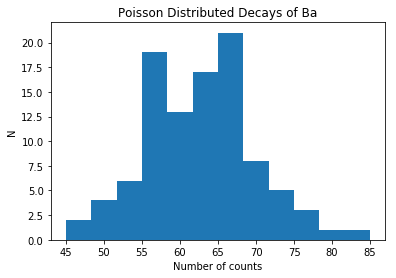

<Figure size 432x288 with 0 Axes>

In [69]:
x = plt.figure()
plt.hist(values,12)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Poisson Distributed Decays of Ba")
plt.show()
x.savefig('ba10.eps',format='eps',dpi=1000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).
Info in <TCanvas::Print>: eps file ba10_1.eps has been created


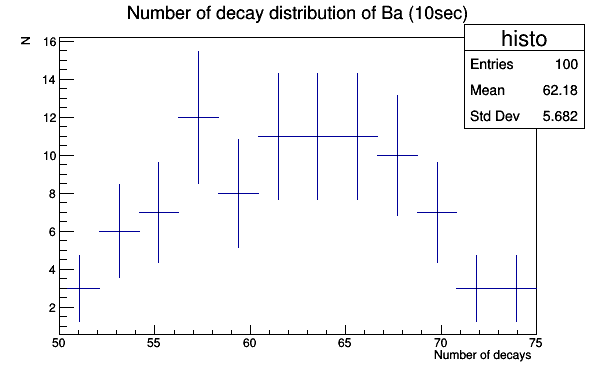

In [60]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

#define a histogram with 20 bins between 60-120 (Change these values according to your data sets!!!)
histo = TH1F("histo", "Number of decay distribution of Ba (10sec)",12, 50, 75) 

#Label the X-Y axis
histo.GetYaxis().SetTitle("N")
histo.GetXaxis ().SetTitle ("Number of decays ");

#Fill the randomly generated data into your histogram
for data_point in values:
    histo.Fill(data_point)

#Draw your histogram with error bars and draw it on the canvas
histo.Draw("E")
c1.Draw()
c1.SaveAs("ba10_1.eps")

 FCN=3.57951 FROM MINOS     STATUS=SUCCESSFUL     20 CALLS         103 TOTAL
                     EDM=1.73062e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.07414e+02   2.20580e+01  -1.67556e+00  -1.47454e-05
   2  p1           6.21621e+01   9.90527e-01   9.90527e-01  -2.09149e-08


Info in <TCanvas::Print>: eps file ba10_2.eps has been created


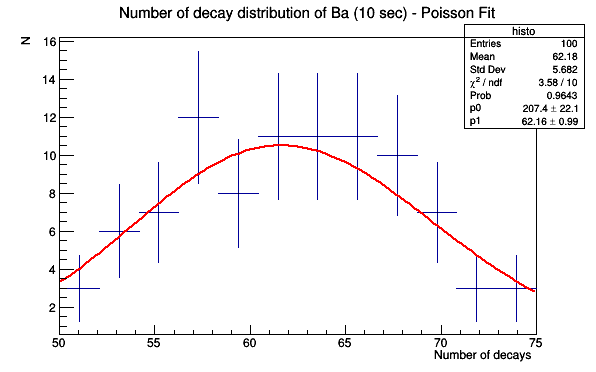

In [61]:
# Define the Poisson function from TMath library in ROOT to fit with two parameters:
#[0]: normalizing constant
#[1]: mean
fpois = TF1("fpois","[0]*TMath::Poisson(x,[1])",50,75) #(Change interval values (60,120) according to your data sets!!!)

#Set the parameters to guide the ROOT fitter to converge easily and fit your histogram
fpois.SetParameters(60, 70) # give reasonable estimates for your parameters to guide ROOT fit to converge
fpois.SetFillColor(41);
histo.Fit("fpois", "E")
histo.SetTitle("Number of decay distribution of Ba (10 sec) - Poisson Fit")
#Set the options to display fit parameters and chi_squared value on the graph
gStyle.SetOptFit(1111)

c1.Draw()
c1.SaveAs("ba10_2.eps")

 FCN=2.82351 FROM MINOS     STATUS=SUCCESSFUL     79 CALLS         263 TOTAL
                     EDM=1.02928e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.14118e+01   1.58955e+00   1.23196e-02  -3.39224e-05
   2  Mean         6.20261e+01   9.07947e-01   1.90116e-03  -7.76255e-06
   3  Sigma        7.01674e+00   9.29174e-01   9.29174e-01  -2.46439e-03


Info in <TCanvas::Print>: eps file ba10_3.eps has been created


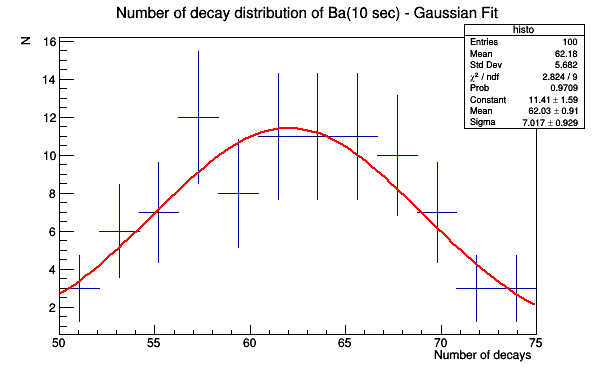

In [62]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(60, 70) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(45);
histo.Fit("fgaus", "E")
histo.SetTitle("Number of decay distribution of Ba(10 sec) - Gaussian Fit")
#histo.Draw("same")
c1.Draw("same")
c1.SaveAs("ba10_3.eps")